Last time, we did the principle and implementation of multiple linear regression.

I knew multi-linear regression was a powerful enough algorithm,

If there is one small problem, the class is not linearly separated

It can't converge. This is because at least one sample per epoch is misclassified and the weight update does not end.  

To solve this problem, we analyze and implement logistic regression, an algorithm that is a little more powerful for linear binary classification.  

Logistic regression has the name regression, but it is practically close to a classification algorithm.  

Logistic regression also has some important concepts like linear regression.

The first one is the odds ratio, which is the probability that a particular event will occur.  

${ \frac{P}{1-P}}$ The formula can be written as follows, where P is the probability of a positive sample.  
For example, the probability that a patient has cancer.  
we can take a log on this odds ratio to define the logit function.  
${ logit(P) = log \frac{P}{1-P}}$  
log here is a natural log.  

As we can see from the equation, the function above takes a value between 0 and 1 and outputs a real range  
Write the linear relationship between the sum of weight of the properties, log odds can be written as seem.  
$P(Y=1|X)=w0x0+w1x1+w2x2+...+wpxp = w^Tx $  
wow, matrix came out again!  
$P(Y=1|X)$ This function means the probability that this sample belongs to 1 given the property x.  
What we need to do is to predict the probability that a sample belongs to a particular class, so let's flip it over.
 
 ${\phi}(z)= \frac{1}{1+e^{-z}} $ Logistic sigmoid function completed.
The detailed induction of the logistic sigmoid function can be found in Wikipedia.  
So let's draw a picture of what a sigmoid looks like.

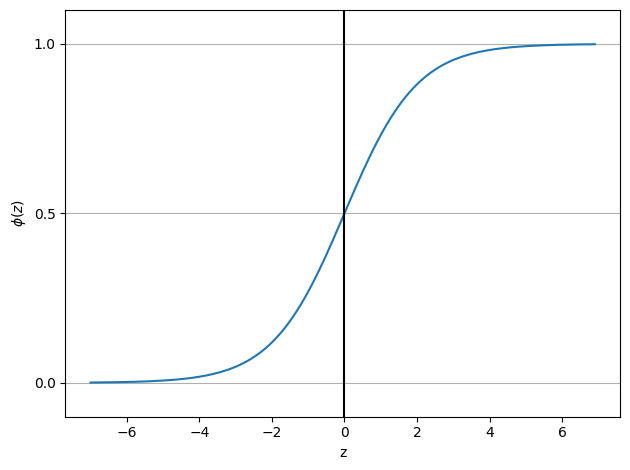

In [230]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

In [231]:
from IPython.display import Image
Image(url='https://git.io/Jtm22', width=500) 


Logistic regression also have cost function and weight learning like linear function

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Cost_Function_Formula.png) 

though $h(x^{(i)}) changed to {\phi}(z^{(i)})$ It's essentially the same.


Hypothesis functions for linear regression are as follows:  h(x) = θ_0 + (θ_1*x_1)....(θ_n*x_n)  
We will use this function as an input to the Sigmoid function to obtain a discrete value.
  z = θ_0 + (θ_1*x_1)....(θ_n*x_n)
The hypothesis function for logistic regression is as follows:  
h(x) = g(z) = g(θ_0 + (θ_1*x_1)....(θ_n*x_n))

Basically, we are using the line function as an input to the sigmoid function to obtain discrete values from 0 to 1.  
The way in which the sigmoid function g(z) behaves is greater when the input is greater than or equal to zero. More than 0.5  
Because positive inputs create positive classes and negative inputs create negative classes, you can set the weight sum of the inputs to zero to separate both classes.  
Decision boundaries distinguish between positive and negative classes.  
The decision boundary is a line that separates an area with y = 0 from an area with y = 1. This is generated by our hypothesis function.  
As discussed earlier, you can find the decision boundary by setting the weight sum of the inputs to zero.  
You can create a formula to find the decision boundaries for two feature (x and x1) datasets.  

  h(x) = θ_0 + (θ_1*x_1) + (θ_2*x_2) = 0
  x_2 = -(θ_0 + (θ_1*x_1)) / θ_2

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [233]:
red_wine = pd.read_csv('../winequality-red.csv', sep=';')
white_wine = pd.read_csv('../winequality-white.csv',sep=';')
#칼럼 추가
df = pd.concat([red_wine, white_wine])
m, n = df.shape
print('Number of training examples m = ', m)
print('Number of features n = ', n - 1) # Not counting the 'Label: Admission status'
df.sample(5) # Show random 5 training examples

Number of training examples m =  6497
Number of features n =  11


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4563,5.6,0.26,0.27,10.6,0.030,27.0,119.0,0.99470,3.40,0.34,10.7,7
3778,6.3,0.15,0.30,1.4,0.022,38.0,100.0,0.99099,3.42,0.57,11.4,7
328,6.5,0.28,0.35,15.4,0.042,55.0,195.0,0.99780,3.23,0.50,9.6,6
3167,5.6,0.28,0.40,6.1,0.034,36.0,118.0,0.99144,3.21,0.43,12.1,7
4289,6.6,0.26,0.27,11.8,0.048,28.0,112.0,0.99606,2.87,0.49,9.7,6


In [234]:
x_data = df.iloc[:,0:-1]
y_data = df.iloc[:,-1]
y_data = np.array([1 if i>=7 else 0 for i in y_data])
print(x_data[:5])
print(y_data[:15])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
[0 0 0 0

In [235]:
def feature_normalize(X):

  #Note here we need mean of indivdual column here, hence axis = 0
  mu = np.mean(X, axis = 0)  
  # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
  sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range) 표준편차 ddof를 지정해주는 이유는 numpy의 std default가 0이기 때문
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma

x_data, mu, sigma = feature_normalize(x_data)

print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', x_data[:5])

mu=  fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
dtype: float64
sigma=  fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
dtype: float64
X_norm=     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142462          2.188664    -2.192664       -0.744721   0.569914   
1       0.451001          3.28198

In [236]:
mu_testing = np.mean(x_data, axis = 0) # mean
mu_testing

fixed acidity          -4.549573e-16
volatile acidity        1.049902e-16
citric acid             2.624754e-17
residual sugar          5.249508e-17
chlorides               1.749836e-17
free sulfur dioxide    -1.049902e-16
total sulfur dioxide    0.000000e+00
density                -3.552167e-15
pH                      2.729744e-15
sulphates              -4.899540e-16
alcohol                 9.799081e-16
dtype: float64

In [237]:
sigma_testing = np.std(x_data, axis = 0, ddof = 1) # mean
sigma_testing

fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64

In [238]:
#Add column of ones (intercept term)
x_data = np.hstack((np.ones((m,1)),x_data))
# Now X is numpy array of 2 dimension
print("Dimension of feature matric X = ", x_data.shape, '\n')

# First 5 records training examples with labels

print('x =', x_data[1, ], ', y =', y_data[1])
print(x_data[:2])
print(y_data[:2])

Dimension of feature matric X =  (6497, 12) 

x = [ 1.          0.45100101  3.28198234 -2.19266376 -0.59759408  1.19788251
 -0.31129613 -0.86240225  0.70143232 -0.11506417  0.99950169 -0.58002349] , y = 0
[[ 1.          0.1424623   2.18866446 -2.19266376 -0.74472079  0.56991395
  -1.10005519 -1.44624721  1.03491316  1.81294997  0.19308191 -0.91539371]
 [ 1.          0.45100101  3.28198234 -2.19266376 -0.59759408  1.19788251
  -0.31129613 -0.86240225  0.70143232 -0.11506417  0.99950169 -0.58002349]]
[0 0]


Now we finished preparation for the function data.
But something is missing from the function above, and I know what sigmoid is, but there's no explanation for the most important weight.
In order to parameterize a logistic regression model, we maximize the likelihood L (or minimize the logistic cost function)  
We write the likelihood as  
$L(\mathbf{w}) = P(\mathbf{y} \mid \mathbf{x};\mathbf{w}) = \prod_{i=1}^{n} P\big(y^{(i)} \mid x^{(i)}; \mathbf{w}\big) = \prod^{n}_{i=1}\bigg(\phi\big(z^{(i)}\big)\bigg)^{y^{(i)}} \bigg(1-\phi\big(z^{(i)}\big)\bigg)^{1-y^{(i)}}$  
under the assumption that the training samples are independent of each other.

In practice, it is easier to maximize the (natural) log of this equation, which is called the log-likelihood function:  
$l(\mathbf{w}) = \log L(\mathbf{w}) = \sum^{n}_{i=1} y^{(i)} \log \bigg(\phi\big(z^{(i)}\big)\bigg) + \big( 1 - y^{(i)}\big) \log \big(1-\phi\big(z^{(i)}\big)\big)$  
One advantage of taking the log is to avoid numeric underflow (and challenges with floating point math) for very small likelihoods.  
 Another advantage is that we can obtain the derivative more easily, using the addition trick to rewrite the product of factors as a summation term,  
 which we can then maximize using optimization algorithms such as gradient ascent.


In [239]:
#시그모이드 함수 생성

def sigmoid(z):

    g = 1 / (1 + np.exp(-z))
    return g

In [240]:
theta = np.zeros(n)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

An alternative to maximizing the log-likelihood, we can define a cost function J to be minimized; we rewrite the log-likelihood as:  
$J(\mathbf{w}) = \sum_{i=1}^{m} - y^{(i)} log \bigg( \phi\big(z^{(i)}\big) \bigg) - \big(1 - y^{(i)}\big) log\bigg(1-\phi\big(z^{(i)}\big)\bigg)$  

$$J\big(\phi(z), y; \mathbf{w}\big) =\begin{cases}
    -log\big(\phi(z) \big) & \text{if $y = 1$}\\
    -log\big(1- \phi(z) \big) & \text{if $y = 0$}
  \end{cases}$$

![title](http://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression_files/logistic_cost.png)

In [241]:
#비용 및 기울기 함수 생성
def cost_function(X, y,theta): #가중치 학습
   """
   this is cost function of sigmoid function 
   Input paramenters
   -------------------
   X: 2D array row means traning example, column means feature ndarray. Dimension(m x n)
         m: number of traning example 
         n: number of features
   y:  1D array of labels/target value 

   theta : 1D array of weights
   """
   #print(X.shape)
   m, n = X.shape
   x_dot_theta = X.dot(theta)

   J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))

   return J

In [242]:
def gradient( X, y,theta):

    m, n = X.shape
    x_dot_theta = X.dot(theta)

    grad = 1.0 / m * (sigmoid(x_dot_theta) - y).T.dot(X)

    return grad

剩下的内引用 PPT  

！[title](../photo/logistic_gradient.png)

In [243]:
def gradient_descent(X, y,theta, alpha, iterations):
  """   
  alpha: learning rate 
  iteration: epoch      
        """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    gradients = gradient(X,y,theta)    
    updated_theta = alpha*gradients #X전치행렬과 에러의 행렬곱
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - updated_theta

    cost_history[i] = cost_function(X, y, theta)  

  return theta, cost_history


In [244]:
cost = cost_function( x_data, y_data,theta)
print ('Cost at initial theta (zeros):', cost)

theta,cost_hist = gradient_descent(x_data, y_data,theta,  0.01, 2000)
print ('Gradient at initial theta (zeros):', cost_hist)

Cost at initial theta (zeros): 0.6931471805599461
Gradient at initial theta (zeros): [0.69176791 0.69039791 0.68903708 ... 0.4010548  0.40104729 0.40103978]


In [245]:
#최적화 기술을 사용하여 세타 값 찾기

#theta, nfeval, rc = opt.fmin_tnc(func=cost_function, fprime= gradient, x0=theta, args=(x_data, y_data))

cost = cost_function( x_data, y_data,theta)
print ('Cost at theta found by fminunc:', cost)
print ('theta:', theta)

Cost at theta found by fminunc: 0.4010397787981264
theta: [-1.56897687  0.10667956 -0.31931135  0.0730255   0.21541776 -0.21280759
  0.12796535 -0.14054887 -0.25612084  0.10339462  0.22676667  0.71618082]


In [247]:
#input_data = np.array([1, 45, 85]) # Note the intercept term '1' in array
input_data = red_wine.iloc[:12,]
prob = sigmoid(np.dot(input_data, theta))
print ('quality predict for the first data', prob)

quality predict for the first data [9.56999491e-03 2.26245436e-02 3.32919607e-02 3.79365630e-04
 9.56999491e-03 1.32670653e-02 4.37013579e-02 4.21068741e-03
 4.46581273e-03 9.57424729e-01 3.88196661e-01 9.57424729e-01]


로지스틱 모델에 대한 예측을 위한 함수를 만들어 보겠습니다. 이 함수는 0과 1 사이의 확률을 예측하는 대신 0.5의 임계값을 사용하여 이산 값을 예측합니다. 확률 >= 0.5일 때 1 그렇지 않으면 0

In [248]:
def predict(theta, X):

    p = sigmoid(X.dot(theta)) >= 0.5
    return p.astype(int)

In [249]:
#모델의 정확도
predictedValue = pd.DataFrame(predict(theta, x_data), columns=['Predicted quality']) # Create new dataframe of column'Predicted Price'
actualAdmissionStatus = pd.DataFrame(y_data, columns=['quality'])
df_actual_vs_predicted = pd.concat([actualAdmissionStatus,predictedValue],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496
quality,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
Predicted quality,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [250]:
p = predict(theta, x_data)
print ('Accuracy:', np.mean(p == y_data) * 100 )

Accuracy: 82.05325534862244


Additional test:  
Accuracy experiments based on threshold values

In [261]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [254]:
lr_clf = LogisticRegression()
lr_clf.fit(x_data, y_data)
sk_predict_value = lr_clf.predict(x_data)
sk_predict_proba = lr_clf.predict_proba(x_data)[:, 1]

In [257]:
# 여러가지 평가지표 값을 반환해주는 함수 작성
def get_score(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)
    
    print('accuracy\t> {}'.format( round(accuracy, 4)))
    print('recall\t\t> {}'.format( round(recall, 4)))
    print('precision\t> {}'.format( round(precision, 4)))
    print('auc\t\t> {}'.format( round(auc, 4)))
    
    return (accuracy, recall, precision, auc)
    

In [255]:
# threshold를 변화해가며 어떤 threshold에서 평가지표가 좋은 지 확인해보고자 한다.
def change_threshold(X, theta, threshold):
    values = X.dot(theta)
    predict_proba = [sigmoid(value) for value in values]
    predict_value = [1 if proba>=threshold else 0 for proba in predict_proba]
    return predict_value, predict_proba

In [260]:
thresholds = np.arange(0.2, 0.9, 0.1)
for threshold in thresholds:
    predict_value, predict_proba = change_threshold(x_data, theta, threshold)
    print(f'threshold = {threshold}')
    get_score(y_data, predict_value, predict_proba)
    print('='*50)

threshold = 0.2
accuracy	> 0.7005
recall		> 0.8175
precision	> 0.3787
auc		> 0.8041
threshold = 0.30000000000000004
accuracy	> 0.7827
recall		> 0.6108
precision	> 0.4602
auc		> 0.8041
threshold = 0.4000000000000001
accuracy	> 0.8104
recall		> 0.3962
precision	> 0.5233
auc		> 0.8041
threshold = 0.5000000000000001
accuracy	> 0.8205
recall		> 0.2294
precision	> 0.6168
auc		> 0.8041
threshold = 0.6000000000000001
accuracy	> 0.8138
recall		> 0.083
precision	> 0.731
auc		> 0.8041
threshold = 0.7000000000000002
accuracy	> 0.8047
recall		> 0.0141
precision	> 0.6429
auc		> 0.8041
threshold = 0.8000000000000003
accuracy	> 0.8033
recall		> 0.0
precision	> 0.0
auc		> 0.8041


threshold = 0.3
accuracy	> 0.7827
recall		> 0.6108
precision	> 0.4602
auc		> 0.8041
threshold = 0.35
accuracy	> 0.8013
recall		> 0.4957
precision	> 0.4945
auc		> 0.8041
threshold = 0.39999999999999997
accuracy	> 0.8104
recall		> 0.3962
precision	> 0.5233
auc		> 0.8041
threshold = 0.44999999999999996
accuracy	> 0.8171
recall		> 0.3125
precision	> 0.5628
auc		> 0.8041
threshold = 0.49999999999999994
accuracy	> 0.8205
recall		> 0.2294
precision	> 0.6168
auc		> 0.8041
threshold = 0.5499999999999999
accuracy	> 0.8181
recall		> 0.148
precision	> 0.6678
auc		> 0.8041
threshold = 0.5999999999999999
accuracy	> 0.8138
recall		> 0.083
precision	> 0.731
auc		> 0.8041
threshold = 0.6499999999999999
accuracy	> 0.8078
recall		> 0.0337
precision	> 0.7414
auc		> 0.8041
threshold = 0.7
accuracy	> 0.8047
recall		> 0.0141
precision	> 0.6429
auc		> 0.8041
threshold = 0.7499999999999999
accuracy	> 0.8034
recall		> 0.0047
precision	> 0.5
auc		> 0.8041
threshold = 0.7999999999999998
accuracy	> 0.8033
recall		

c:\Users\joong\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


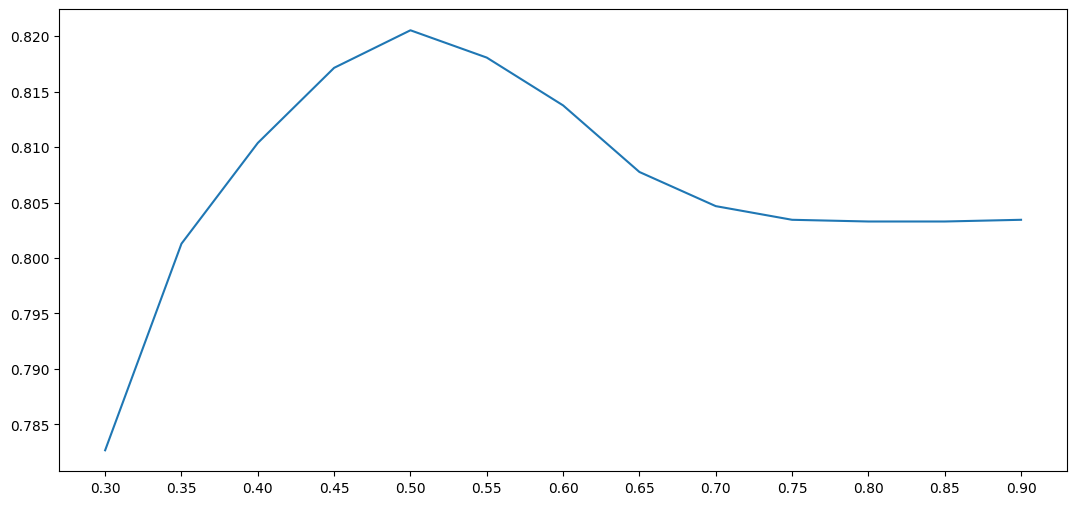

In [264]:
thresholds = np.arange(0.3, 0.9, 0.05)
accuracy_dict = {}
for threshold in thresholds:
    predict_value, predict_proba = change_threshold(x_data, theta, threshold)
    print(f'threshold = {threshold}')
    accuracy, _, _, _ = get_score(y_data, predict_value, predict_proba)
    accuracy_dict[threshold] = accuracy
    print('='*50)

plt.figure(figsize=(13, 6))
sns.lineplot(x=thresholds, y=list(accuracy_dict.values()))
#plt.axvline(x=0.74, ymin=0, ymax=1, ls='--', c='red')
#plt.axhline(y=accuracy_dict[0.74], xmin=0, xmax=1, ls='--', c='green')
plt.xticks(ticks=thresholds)
plt.show()

# 구간을 좀 더 세밀하게 하여 thresholds를 조정해본 결과
# threhsold가 0.8일 때 accuracy가 0.9091로 가장 높게 나왔다.
# 이 때의 다른 평가지표들도 다른 threshold에 비해 고르게 좋은 결과가 나왔다.